In [1]:
import pandas as pd
import numpy as np
import os

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import fetch_california_housing

In [35]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\Rohan\ML\Datasets\California Housing Prices\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
df.shape

(20640, 10)

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Impute using mean
imputer = SimpleImputer(strategy="mean")
df["total_bedrooms"] = imputer.fit_transform(df[["total_bedrooms"]])

# encoding
label_encoder = LabelEncoder()
df["ocean_proximity"] = label_encoder.fit_transform(df["ocean_proximity"])

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

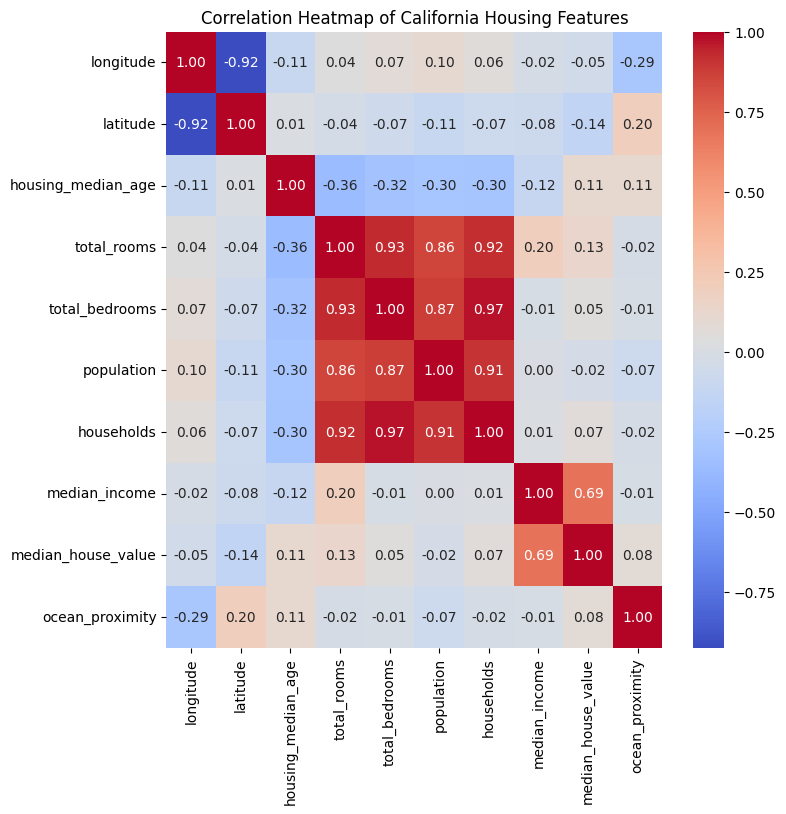

In [14]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of California Housing Features")
plt.show()

In [23]:
# Linear regression

from sklearn.metrics import r2_score

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [43]:
results_df_columns = ["Model", "train_mse", "test_mse", "train_r2", "test_r2"]
results_df = pd.DataFrame(columns=results_df_columns)
results_df.head()

,Model,train_mse,test_mse,train_r2,test_r2


In [44]:
new_row = {
    "Model": "Linear Regression",
    "train_mse": round(train_mse, 4),
    "test_mse": round(test_mse, 4),
    "train_r2": round(train_r2, 4),
    "test_r2": round(test_r2, 4),
}

new_row_df = pd.DataFrame([new_row])
results_df = pd.concat([results_df, new_row_df], ignore_index=True)
results_df.head()

,Model,train_mse,test_mse,train_r2,test_r2
0,Linear Regression,4.810958e+09,5.055025e+09,0.6401,0.6142
